# DS-SF-36 | 10 | Linear Regression, Part 3 | Codealong | Starter Code

In [1]:
import os

import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 20)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 10)

import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn import linear_model

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

import seaborn as sns

C:\Users\Jagupta\AppData\Local\Continuum\Anaconda2\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


## Part A | Model Fit and Customer Retention

In [48]:
# TODO
train_df['logSR'] = train_df.survival_rate.apply(np.log)
train_df

,t,survival_rate,logSR
0,0,1.000,0.000000
1,1,0.869,-0.140412
2,2,0.743,-0.297059
3,3,0.653,-0.426178
4,4,0.593,-0.522561
5,5,0.551,-0.596020
6,6,0.517,-0.659712
7,7,0.491,-0.711311


In [22]:
train_df = pd.DataFrame({'t': range(8),
       'survival_rate': [1., .869, .743, .653, .593, .551, .517, .491]},
   columns = ['t', 'survival_rate'])

In [52]:
model = smf.ols(formula = 'survival_rate ~  logSR', data = train_df).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          survival_rate   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     632.3
Date:                Wed, 26 Jul 2017   Prob (F-statistic):           2.60e-07
Time:                        20:40:33   Log-Likelihood:                 21.526
No. Observations:                   8   AIC:                            -39.05
Df Residuals:                       6   BIC:                            -38.89
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9737      0.014     71.781      0.000       0.941       1.007
logSR          0.7076      0.028     25.146      0.000       0.639       0.776
==============================================================================
Omnibus:                        1.119   Durbin-Watson:                   0.758
Prob(Omnibus):                  0.572   Jarque-Bera (JB):                0.675
Skew:                           0.305   Prob(JB):                        0.713
Kurtosis:                       1.713   Cond. No.                         4.97
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
predict_X = pd.DataFrame({'t': [8, 9, 10, 11,12]}, columns = ['t'])

predict_X


,t
0,8
1,9
2,10
3,11
4,12


In [44]:
df_result= model.predict(predict_X)
df_result=pd.DataFrame(df_result)
a=pd.Series.to_frame (model.predict(predict_X))

df_result1=pd.merge(predict_X,a,on= 'Index')

df_result1

#df_train1.append(df_result).plot()




KeyError: 'Index'

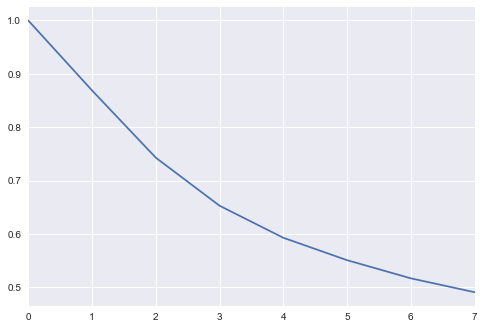

In [42]:
train_df.survival_rate.plot()

## Part B | One-Hot Encoding for Categorical Variables and SF Housing

In [ ]:
df = pd.read_csv(os.path.join('..', 'datasets', 'dataset-10-zillow.csv'), index_col = 'ID')

In [ ]:
df.drop(df[df.IsAStudio == 1].index, inplace = True)

In [ ]:
smf.ols(formula = 'SalePrice ~ Baths', data = df).fit().summary()

> ### What's the bathrooms' distribution in the dataset?

In [ ]:
# TODO

> ### Let's keep properties with 1, 2, 3, or 4 bathrooms

In [ ]:
# TODO

> ### Let's use `pandas`'s `get_dummies` to create a one-hot encoding of the `Bath` categorical feature

In [ ]:
# TODO

In [ ]:
baths_df

In [ ]:
baths_df.rename(columns = {'Bath_1.0': 'Bath_1',
    'Bath_2.0': 'Bath_2',
    'Bath_3.0': 'Bath_3',
    'Bath_4.0': 'Bath_4'}, inplace = True)

In [ ]:
baths_df

In [ ]:
df = df.join([baths_df])

In [ ]:
df.columns

### Activity | Linear modeling using `Bath`'s one-hot encoding

> ### `SalesPrice` as a function of `Bath_2`, `Bath_3`, and `Bath_4`

In [ ]:
# TODO

> ### `SalesPrice` as a function of `Bath_1`, `Bath_3`, and `Bath_4`

In [ ]:
# TODO

> ### `SalesPrice` as a function of `Bath_1`, `Bath_2`, and `Bath_4`

In [ ]:
# TODO

> ### `SalesPrice` as a function of `Bath_1`, `Bath_2`, and `Bath_3`

In [ ]:
# TODO

## Part C | The Adverstising Dataset

In [ ]:
df = pd.read_csv(os.path.join('..', 'datasets', 'dataset-10-advertising.csv'))

In [ ]:
df

### Plots

> ### Sales ~ TV

In [ ]:
sns.lmplot(x = 'TV', y = 'Sales', data = df)

> ### Sales ~ Radio

In [ ]:
sns.lmplot(x = 'Radio', y = 'Sales', data = df)

> ### Sales ~ Newspaper

In [ ]:
sns.lmplot(x = 'Newspaper', y = 'Sales', data = df)

### Simple linear regressions

> ### Sales ~ TV

In [ ]:
model_tv = smf.ols(formula = 'Sales ~ TV', data = df).fit()

model_tv.summary()

> ### Sales ~ Radio

In [ ]:
model_radio = smf.ols(formula = 'Sales ~ Radio', data = df).fit()

model_radio.summary()

> ### Sales ~ Newspaper

In [ ]:
model_newspaper = smf.ols(formula = 'Sales ~ Newspaper', data = df).fit()

model_newspaper.summary()

### Residuals

> ### Sales ~ TV

In [ ]:
sm.qqplot(model_tv.resid, line = 's')

pass

In [ ]:
sm.graphics.plot_regress_exog(model_tv, 'TV')

pass

> ### Sales ~ Radio

In [ ]:
sm.qqplot(model_radio.resid, line = 's')

pass

In [ ]:
sm.graphics.plot_regress_exog(model_radio, 'Radio')

pass

> ### Sales ~ Newspaper

In [ ]:
sm.qqplot(model_newspaper.resid, line = 's')

pass

In [ ]:
sm.graphics.plot_regress_exog(model_newspaper, 'Newspaper')

pass

> ### Sales ~ TV + Radio + Newspaper

In [ ]:
# TODO

model.summary()

> ### Sales ~ TV + Radio

In [ ]:
# TODO

model.summary()

In [ ]:
sm.qqplot(model.resid, line = 's')

pass

In [ ]:
sm.graphics.plot_regress_exog(model, 'TV')

pass

In [ ]:
sm.graphics.plot_regress_exog(model, 'Radio')

pass

## Part D | Interaction Effects and Advertising

### Sales ~ TV + Radio + TV * Radio

In [ ]:
model = smf.ols(formula = 'Sales ~ TV + Radio + TV * Radio', data = df).fit()

model.summary()

In [ ]:
sm.qqplot(model.resid, line = 's')

pass

In [ ]:
sm.graphics.plot_regress_exog(model, 'TV')

pass

In [ ]:
sm.graphics.plot_regress_exog(model, 'Radio')

pass

In [ ]:
sm.graphics.plot_regress_exog(model, 'TV:Radio')

pass